In [1]:
# Tensorflow and tf.keras
import tensorflow as tf 
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
# 添加下行代码可在notebook中展示matplotlib生成的图片
%matplotlib inline

print(tf.__version__)

2.1.0


In [2]:
# Import the Fashion MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist
# Loading the dataset returns 4 Numpy arrays
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
# The images are 28x28 numpy arrays,with pixel values ranging from 0 to 255.
print("train_iamges.shape:",train_images.shape)
# The labels are an array of integers, ranging from 0 to 9.These correspond to the class of clothing the image represents:
# 0:T-shirt/top
# 1:Trouser
# 2:Pullover
# 3:Dress
# 4:Coat
# 5:Sandal
# 6:Shirt
# 7:Sneaker
# 8:Bag
# 9:Ankle boot
print("train_labels.shape:",train_labels.shape)

train_iamges.shape: (60000, 28, 28)
train_labels.shape: (60000,)


In [3]:
# storage the 10 classes into a list
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

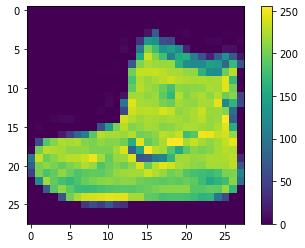

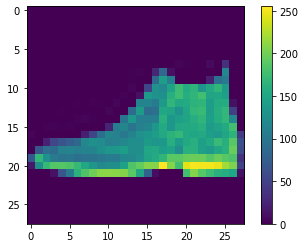

In [4]:
# Use this function you can see the pixel values fall in the range of 0 to 255
def show_img_colorbar(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()
show_img_colorbar(train_images[0])
show_img_colorbar(test_images[0])

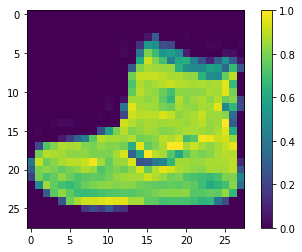

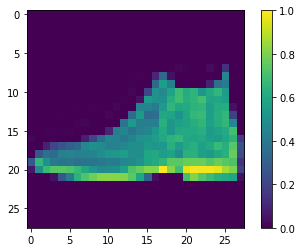

In [5]:
# scale these pixel values to a range of 0 to 1
# test set shuold do the same as train set
train_images = train_images/255.0
test_images = test_images/255.0

# after scaled, the img didn't change although the range has changed
show_img_colorbar(train_images[0])
show_img_colorbar(test_images[0])

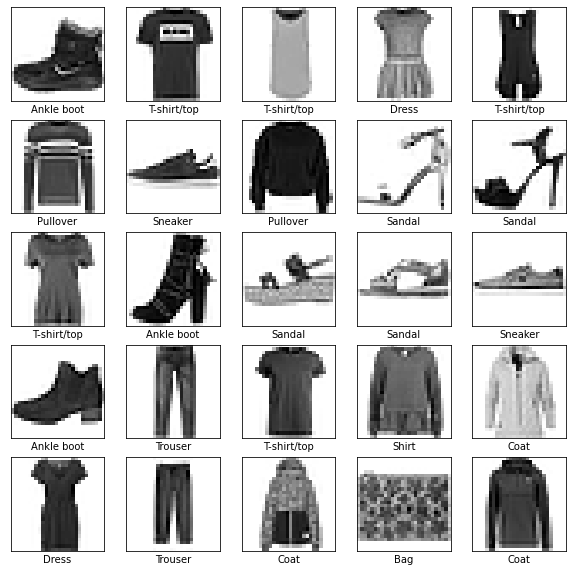

In [6]:
def display_images(images,image_num,labels):
    plt.figure(figsize=(10,10))
    for i in range(image_num):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_images(train_images,25,train_labels)

In [12]:
# Build the model
model=keras.Sequential([
    # keras.layers.Flatten transforms the format of the images from a two-dimensional array(of 28x28 pixels) to a one-dimensional array(of 28*28=784 pixels)
    keras.layers.Flatten(input_shape=(28,28)),
    # keras.layers.Dense:fully connected neural layer
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
# 1.Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# 2.Optimizer —This is how the model is updated based on the data it sees and its loss function.
# 3.Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# print the structure of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model

# To start training, call the model.fit method—so called because it "fits" the model to the training data:
model.fit(train_images,train_labels,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4962 - accuracy: 0.8241
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3726 - accuracy: 0.8652
Epoch 3/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3351 - accuracy: 0.8775
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3112 - accuracy: 0.8855
Epoch 5/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2937 - accuracy: 0.8918
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2792 - accuracy: 0.8968
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2678 - accuracy: 0.9007
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2577 - accuracy: 0.9039
Epoch 9/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2487 - accuracy: 0.9082
Epoch 10/20
60

In [15]:
# This gap between training accuracy and test accuracy represents overfitting.
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

10000/10000 - 1s - loss: 0.3490 - accuracy: 0.8896

Test accuracy: 0.8896


In [16]:
# Make predictions

# Softmax layer convert the logits to probabilities
probability_model=keras.Sequential([model,keras.layers.Softmax()])

predictions=probability_model.predict(test_images)
predictions[0]

array([1.5950793e-10, 3.4406789e-10, 2.1609357e-13, 3.8774634e-14,
       1.3165631e-11, 6.1470637e-05, 3.0008304e-10, 4.6707969e-03,
       4.1768186e-12, 9.9526775e-01], dtype=float32)

In [21]:
print("prediction_label:",np.argmax(predictions[0]))
print("true_label:",test_labels[0])

prediction_label: 9
true_label: 9


In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

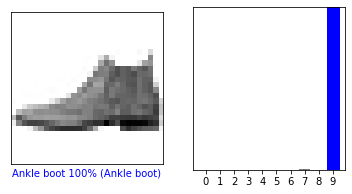

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

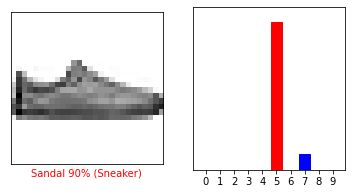

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

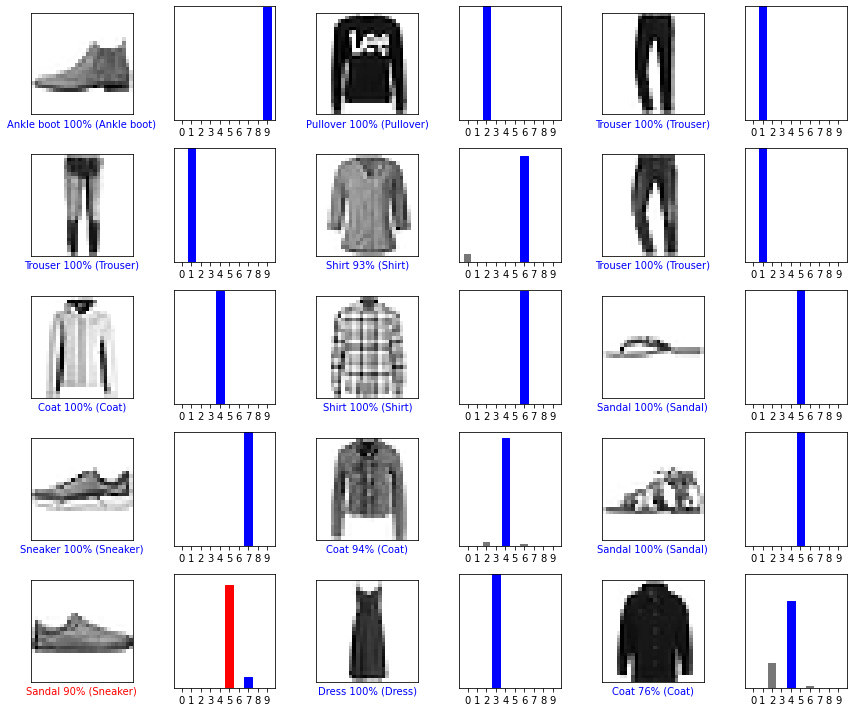

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Use the trained model: use the trained model to make a prediction about a single image.

img = test_images[24]
print(img.shape)

(28, 28)


In [30]:
img=np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [32]:
prediction_single=probability_model.predict(img)
print(prediction_single)

[[1.2396064e-08 1.0000000e+00 1.0325842e-11 2.1302677e-09 6.1361333e-13
  1.1962000e-22 5.7414910e-11 3.9591402e-36 7.7304123e-15 1.0569104e-25]]


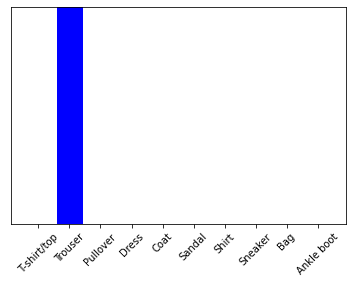

In [36]:
plot_value_array(24, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
print("prediction_label:",np.argmax(prediction_single[0]))
print("true_label:",test_labels[24])

prediction_label: 1
true_label: 1
